In [37]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import pprint
import json
import matplotlib.pyplot as plt

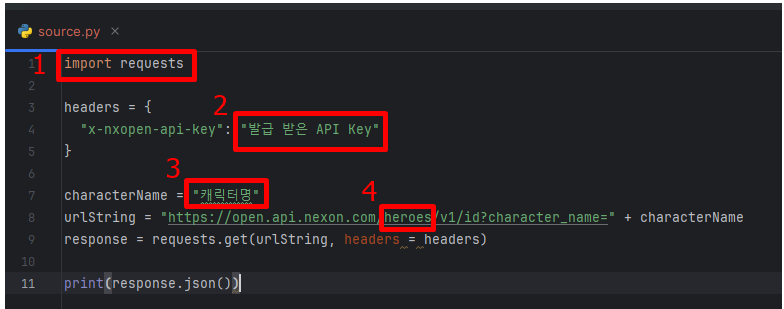

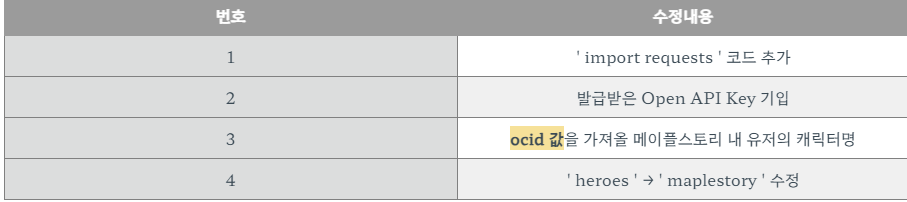

# 캐릭터 기본 정보 조회

In [83]:
import requests
headers = {
"x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}
  
characterName = "난싸개다"
urlString = "https://open.api.nexon.com/maplestory/v1/id?character_name=" + characterName
response = requests.get(urlString, headers = headers)
  
print(response.json())

{'ocid': '9fa6b90baf51e7bc8050e7ba137a56f9'}


In [78]:
import requests
headers = {
"x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}

characterName = input('캐릭터 이름')
urlString = "https://open.api.nexon.com/maplestory/v1/id?character_name=" + characterName
response = requests.get(urlString, headers = headers)
    
ocid = response.json()['ocid']
      
urlString = "https://open.api.nexon.com/maplestory/v1/character/basic?ocid="+ ocid +"&2024-07-21"
response = requests.get(urlString, headers = headers)
    
print(response.json())

캐릭터 이름 성공한근아


{'date': None, 'character_name': '성공한근아', 'world_name': '버닝', 'character_gender': '남', 'character_class': '보우마스터', 'character_class_level': '6', 'character_level': 260, 'character_exp': 1024739003268, 'character_exp_rate': '59.168', 'character_guild_name': None, 'character_image': 'https://open.api.nexon.com/static/maplestory/Character/HPEDKCKNJCOOAFDEOGCHLCINNMKCCAMOOFCHCNIENEAOJICAPJMGHKBBIGFHJJLGINMDGACHHDEBOMIBIMBABICDOBLDCHCPMKJFCFNCGFFGKHINIFBDJDEKKIBIIICODABHIBBMHLLMMDMOPLELHMJHKCOJFDNBNBMCPMANAMLADIFALKKKMOKKBEHHHKMDMNICHGDGHIBLNLBBNJPBCDMEFBHOCEPHLICHFKOHAFOOPGBNNINDMGONDJLLIAHM.png', 'character_date_create': '2024-06-22T00:00+09:00', 'access_flag': 'true', 'liberation_quest_clear_flag': 'false'}


In [146]:
import requests
import json
import pandas as pd

headers = {
    "x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# 리스트를 사용하여 변수 초기화
characterNames = []
urlStrings = []
responses = []
data = []

# 여러 캐릭터 이름을 한 번에 입력받아 처리
character_names_input = input('캐릭터 이름들을 공백으로 구분하여 입력하세요: ')
characterNames = character_names_input.split()

for character_name in characterNames:
    urlString = "https://open.api.nexon.com/maplestory/v1/id?character_name=" + character_name +"&2024-07-22"
    response = requests.get(urlString, headers=headers)
    
    if response.status_code == 200:
        ocid = response.json()['ocid']
        urlString = "https://open.api.nexon.com/maplestory/v1/character/basic?ocid=" + ocid
        response = requests.get(urlString, headers=headers)
        urlStrings.append(urlString)
        responses.append(response)
    else:
        print(f"{character_name}의 OCID를 가져오는 중 오류 발생: {response.status_code}")
        urlStrings.append(None)
        responses.append(None)

# 각 리스트의 내용을 출력하고 데이터프레임에 추가
for i in range(len(characterNames)):
    if responses[i] is not None and responses[i].status_code == 200:
        print(f"캐릭터 이름: {characterNames[i]}")
        print(f"URL: {urlStrings[i]}")
        print(f"Response: {responses[i].json()}")
        data.append(pd.json_normalize(responses[i].json()))
    else:
        print(f"{characterNames[i]}의 데이터를 가져오는 중 오류 발생")

# 데이터프레임으로 결합
if data:
    chdata = pd.concat(data, ignore_index=True)
    print(chdata)
else:
    print("표시할 데이터가 없습니다.")


캐릭터 이름들을 공백으로 구분하여 입력하세요:  감팡검 아델 세계 건물주 아크 1991 시프 솔라 도적 동정녀 꾸장 여명 후니 진격캐넌 초코빵내꺼야 버터 스프 페이커 알티 맑음 겨울 불행 솔Ol랑 낙지 패파 조선우 용준이 식초 샌직 여우 수호 독사 치어 고릴라 공주 애인 쵸파 혈점 차트 김건희 토니 토르 팔라딘 카카 비숍 냉은 렌조 도끼 뼁훈 자유 핑키o 글죠 YouTube피엘 휴씨엔버 해류 지용 무식 마린 치임 윈드 칼리 헬롱 리셋 포도먹는표도 브이 이상 흑갠 고딩 구닌 꿈달 뜬궁 코비팍 뚱달콤 고집론 타일런트 축일추풍 석현 든기 목성 장브로 연인 무토 남고딩 테러비터 포던 낭들 처서 돌격기 어쌔 조인성 장판 대갈텀 피글렛 성배 리플 비올팬 을가 토햐 리터


1991의 OCID를 가져오는 중 오류 발생: 429
시프의 OCID를 가져오는 중 오류 발생: 429
솔라의 OCID를 가져오는 중 오류 발생: 429
도적의 OCID를 가져오는 중 오류 발생: 429
동정녀의 OCID를 가져오는 중 오류 발생: 429
꾸장의 OCID를 가져오는 중 오류 발생: 429
여명의 OCID를 가져오는 중 오류 발생: 429
후니의 OCID를 가져오는 중 오류 발생: 429
진격캐넌의 OCID를 가져오는 중 오류 발생: 429
초코빵내꺼야의 OCID를 가져오는 중 오류 발생: 429
버터의 OCID를 가져오는 중 오류 발생: 429
스프의 OCID를 가져오는 중 오류 발생: 429
페이커의 OCID를 가져오는 중 오류 발생: 429
알티의 OCID를 가져오는 중 오류 발생: 429
맑음의 OCID를 가져오는 중 오류 발생: 429
겨울의 OCID를 가져오는 중 오류 발생: 429
솔Ol랑의 OCID를 가져오는 중 오류 발생: 429
낙지의 OCID를 가져오는 중 오류 발생: 429
패파의 OCID를 가져오는 중 오류 발생: 429
조선우의 OCID를 가져오는 중 오류 발생: 429
용준이의 OCID를 가져오는 중 오류 발생: 429
식초의 OCID를 가져오는 중 오류 발생: 429
샌직의 OCID를 가져오는 중 오류 발생: 429
여우의 OCID를 가져오는 중 오류 발생: 429
수호의 OCID를 가져오는 중 오류 발생: 429
독사의 OCID를 가져오는 중 오류 발생: 429
치어의 OCID를 가져오는 중 오류 발생: 429
고릴라의 OCID를 가져오는 중 오류 발생: 429
공주의 OCID를 가져오는 중 오류 발생: 429
애인의 OCID를 가져오는 중 오류 발생: 429
쵸파의 OCID를 가져오는 중 오류 발생: 429
혈점의 OCID를 가져오는 중 오류 발생: 429
차트의 OCID를 가져오는 중 오류 발생: 429
김건희의 OCID를 가져오는 중 오류 발생: 429
토니의 OCID를 가져오는 중 오류 발생: 429
토르의 

# 여러개의 계정을 불러올때 사용하는 프로그램

In [166]:
import requests
import json
import pandas as pd
import time

headers = {
    "x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}

def get_response_with_retry(url, headers, max_retries=5, delay=2):
    for attempt in range(max_retries):
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response
        elif response.status_code == 429:
            print(f"429 오류 발생. {delay}초 후에 재시도합니다...")
            time.sleep(delay)
            delay *= 2  # 지연 시간을 기하급수적으로 증가시킴
        else:
            response.raise_for_status()  # 다른 오류는 예외 발생
    return None

# 리스트를 사용하여 변수 초기화
characterNames = []
urlStrings = []
responses = []
data = []

# 여러 캐릭터 이름을 한 번에 입력받아 처리
character_names_input = input('캐릭터 이름들을 공백으로 구분하여 입력하세요: ')
characterNames = character_names_input.split()

for character_name in characterNames:
    urlString = "https://open.api.nexon.com/maplestory/v1/id?character_name=" + character_name+"&2024-07-22"
    response = get_response_with_retry(urlString, headers)
    
    if response:
        ocid = response.json()['ocid']
        urlString = "https://open.api.nexon.com/maplestory/v1/character/basic?ocid=" + ocid
        response = get_response_with_retry(urlString, headers)
        urlStrings.append(urlString)
        responses.append(response)
    else:
        print(f"{character_name}의 OCID를 가져오는 중 오류 발생")
        urlStrings.append(None)
        responses.append(None)

# 각 리스트의 내용을 출력하고 데이터프레임에 추가
for i in range(len(characterNames)):
    if responses[i] is not None:
        print(f"캐릭터 이름: {characterNames[i]}")
        print(f"URL: {urlStrings[i]}")
        print(f"Response: {responses[i].json()}")
        data.append(pd.json_normalize(responses[i].json()))
    else:
        print(f"{characterNames[i]}의 데이터를 가져오는 중 오류 발생")

# 데이터프레임으로 결합
if data:
    chdata = pd.concat(data, ignore_index=True)
    print(chdata)
else:
    print("표시할 데이터가 없습니다.")


캐릭터 이름들을 공백으로 구분하여 입력하세요:  난싸개다


캐릭터 이름: 난싸개다
URL: https://open.api.nexon.com/maplestory/v1/character/basic?ocid=9fa6b90baf51e7bc8050e7ba137a56f9
Response: {'date': None, 'character_name': '난싸개다', 'world_name': '버닝', 'character_gender': '여', 'character_class': '메카닉', 'character_class_level': '5', 'character_level': 260, 'character_exp': 740681692206, 'character_exp_rate': '42.767', 'character_guild_name': None, 'character_image': 'https://open.api.nexon.com/static/maplestory/Character/IMCOKBKANIAFPMCHNHKKKHJCDFBNPOPAFHNIHDMJNJONJCABECBGONIPJCJGHALLFGGAPBOHJIIMKJNFEFNDONCACDNGPEJCLFGIACKGCOLNFECKGDKGCAFMJHMNHINFMNFHNFECDKGJGGEDIEJFJKAEEDIPJMOHDGMIMDJMNCKNNMHMOKDIGNLADJENDFPFBLKIAADDCOCLDLOPACLMMLLNLFPFLFJGEIACKBHGLLDDEEOGKOBCDDKNJMDJLAFE.png', 'character_date_create': '2024-06-25T00:00+09:00', 'access_flag': 'true', 'liberation_quest_clear_flag': 'false'}
   date character_name world_name character_gender character_class  \
0  None           난싸개다         버닝                여             메카닉   

  character_class_level  

In [3]:
import requests
import pandas as pd
from datetime import datetime, timedelta

headers = {
    "x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# Character name and start date input
character_name = input('캐릭터 이름을 입력하세요: ')
start_date_input = input('시작 날짜를 입력하세요 (형식: YYYY-MM-DD): ')

# Convert start date to datetime object
start_date = datetime.strptime(start_date_input, "%Y-%m-%d")

# Calculate the end date (current date - 1)
end_date = datetime.now() - timedelta(days=1)

# Generate list of dates from start_date to end_date
date_list = [(start_date + timedelta(days=x)).strftime("%Y-%m-%d") for x in range((end_date - start_date).days + 1)]

# Get OCID for the character
urlString = f"https://open.api.nexon.com/maplestory/v1/id?character_name={character_name}"
response = requests.get(urlString, headers=headers)

if response.status_code == 200:
    ocid = response.json()['ocid']
    
    data = []
    
    for date in date_list:
        urlString = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={date}"
        response = requests.get(urlString, headers=headers)
        
        if response.status_code == 200:
            print(f"날짜: {date}")
            print(f"URL: {urlString}")
            print(f"Response: {response.json()}")
            data.append(pd.json_normalize(response.json()))
        else:
            print(f"{date}의 데이터를 가져오는 중 오류 발생: {response.status_code}")
    
    # Combine data into a DataFrame
    if data:
        chdata = pd.concat(data, ignore_index=True)
        print(chdata)
    else:
        print("표시할 데이터가 없습니다.")
else:
    print(f"{character_name}의 OCID를 가져오는 중 오류 발생: {response.status_code}")


캐릭터 이름을 입력하세요:  난싸개다
시작 날짜를 입력하세요 (형식: YYYY-MM-DD):  2024-06-25


날짜: 2024-06-25
URL: https://open.api.nexon.com/maplestory/v1/character/basic?ocid=9fa6b90baf51e7bc8050e7ba137a56f9&date=2024-06-25
Response: {'date': '2024-06-25T00:00+09:00', 'character_name': '난싸개다', 'world_name': '버닝', 'character_gender': '여', 'character_class': '메카닉', 'character_class_level': '1', 'character_level': 10, 'character_exp': 467, 'character_exp_rate': '37.601', 'character_guild_name': None, 'character_image': 'https://open.api.nexon.com/static/maplestory/Character/DLMBJOIPABKLDHINEAMDJCJBFOKKKKKIOPFPEAOKNGCHBDCBHIHIKKIINNNCKNBPAGKNMJBKOKFKMKAPJINNCIALDMPFCGBINIECBCCADBMLOHBDJAGJKBOPFKILNIMOLHFBEFIMKJFBIBLKKAKPJPEEONDDNALJEFNKCCMKGEOPAHPJNKMJPCCMBMKEKHKMLDOOBPMGLDIBOLBENIGIODLMCPNANMEJHJGPFGHHGEEDABBPNPGGHFDHPGOHGLMF.png', 'character_date_create': '2024-06-25T00:00+09:00', 'access_flag': 'true', 'liberation_quest_clear_flag': 'false'}
날짜: 2024-06-26
URL: https://open.api.nexon.com/maplestory/v1/character/basic?ocid=9fa6b90baf51e7bc8050e7ba137a56f9&date=2024-06-26
Respons

몇 개의 계정 데이터를 가져오시겠습니까?  3
계정 1의 캐릭터 이름을 입력하세요:  난싸개다
계정 1의 시작 날짜를 입력하세요 (형식: YYYY-MM-DD):  2024-06-25
계정 2의 캐릭터 이름을 입력하세요:  성공한근아
계정 2의 시작 날짜를 입력하세요 (형식: YYYY-MM-DD):  2024-06-22
계정 3의 캐릭터 이름을 입력하세요:  성공한연택
계정 3의 시작 날짜를 입력하세요 (형식: YYYY-MM-DD):  2024-06-25


429 Too Many Requests - 잠시 대기 후 다시 시도합니다.
429 Too Many Requests - 잠시 대기 후 다시 시도합니다.
429 Too Many Requests - 잠시 대기 후 다시 시도합니다.
429 Too Many Requests - 잠시 대기 후 다시 시도합니다.
429 Too Many Requests - 잠시 대기 후 다시 시도합니다.
429 Too Many Requests - 잠시 대기 후 다시 시도합니다.


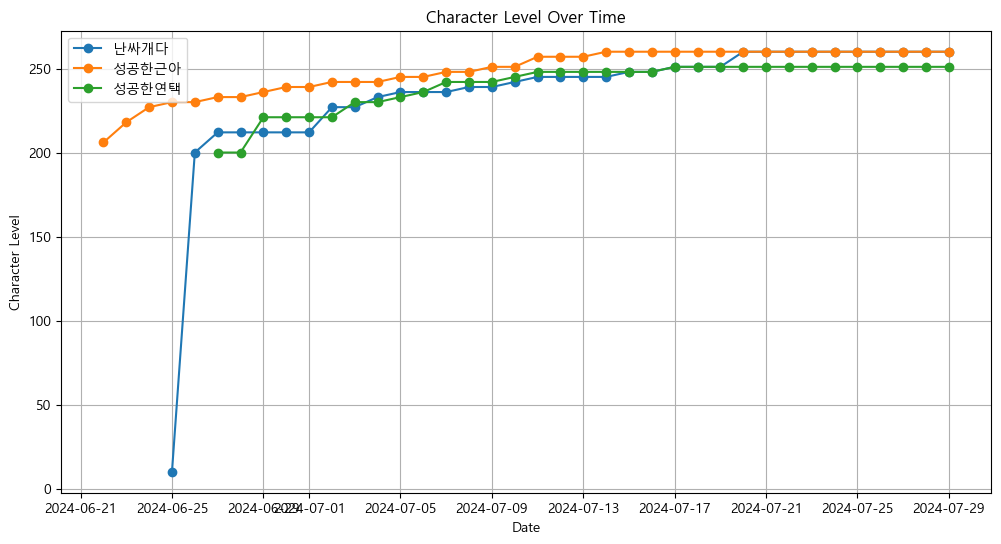

In [23]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt
plt.rc("font", family = "Malgun Gothic")

# API 키
headers = {
    "x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# 여러 계정의 캐릭터 이름과 시작 날짜를 입력받음
accounts = []
num_accounts = int(input('몇 개의 계정 데이터를 가져오시겠습니까? '))

for i in range(num_accounts):
    character_name = input(f'계정 {i+1}의 캐릭터 이름을 입력하세요: ')
    start_date_input = input(f'계정 {i+1}의 시작 날짜를 입력하세요 (형식: YYYY-MM-DD): ')
    start_date = datetime.strptime(start_date_input, "%Y-%m-%d")
    accounts.append((character_name, start_date))

# 현재 날짜
end_date = datetime.now() - timedelta(days=1)

# 데이터 수집 및 병합
all_data = []

def get_response(url, headers, retries=3, wait=10):
    """Get a response with retry logic for 429 errors."""
    for _ in range(retries):
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response
        elif response.status_code == 429:
            print(f"429 Too Many Requests - 잠시 대기 후 다시 시도합니다.")
            time.sleep(wait)  # wait before retrying
        else:
            print(f"Error {response.status_code} - {response.reason}")
            break
    return None

for character_name, start_date in accounts:
    # 캐릭터 OCID 가져오기
    urlString = f"https://open.api.nexon.com/maplestory/v1/id?character_name={character_name}"
    response = get_response(urlString, headers)

    if response and response.status_code == 200:
        ocid = response.json()['ocid']
        data = []
        
        date_list = [(start_date + timedelta(days=x)).strftime("%Y-%m-%d") for x in range((end_date - start_date).days + 1)]
        
        for date in date_list:
            urlString = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={date}"
            response = get_response(urlString, headers)
            
            if response and response.status_code == 200:
                character_data = response.json()
                character_data['date'] = date  # 날짜 정보 추가
                character_data['character_name'] = character_name  # 캐릭터 이름 추가
                data.append(pd.json_normalize(character_data))
            else:
                print(f"{date}의 데이터를 가져오는 중 오류 발생: {response.status_code}")

        if data:
            account_data = pd.concat(data, ignore_index=True)
            all_data.append(account_data)
        else:
            print(f"{character_name}의 데이터를 표시할 데이터가 없습니다.")
    else:
        print(f"{character_name}의 OCID를 가져오는 중 오류 발생: {response.status_code}")

# 모든 계정의 데이터를 병합
if all_data:
    merged_data = pd.concat(all_data, ignore_index=True)

    # 'date' 컬럼을 datetime 형식으로 변환
    merged_data['date'] = pd.to_datetime(merged_data['date'])

    # 그래프 생성
    plt.figure(figsize=(12, 6))

    for character_name in merged_data['character_name'].unique():
        character_data = merged_data[merged_data['character_name'] == character_name]
        plt.plot(character_data['date'], character_data['character_level'], marker='o', label=character_name)

    plt.xlabel('Date')
    plt.ylabel('Character Level')
    plt.title('Character Level Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("표시할 데이터가 없습니다.")


몇 개의 계정 데이터를 가져오시겠습니까?  3
계정 1의 캐릭터 이름을 입력하세요:  성공한근아
계정 1의 시작 날짜를 입력하세요 (형식: YYYY-MM-DD):  2024-06-22
계정 2의 캐릭터 이름을 입력하세요:  난싸개다
계정 2의 시작 날짜를 입력하세요 (형식: YYYY-MM-DD):  2024-06-25
계정 3의 캐릭터 이름을 입력하세요:  성공한연택
계정 3의 시작 날짜를 입력하세요 (형식: YYYY-MM-DD):  2024-06-22


429 Too Many Requests - 잠시 대기 후 다시 시도합니다.
429 Too Many Requests - 잠시 대기 후 다시 시도합니다.
429 Too Many Requests - 잠시 대기 후 다시 시도합니다.
429 Too Many Requests - 잠시 대기 후 다시 시도합니다.
429 Too Many Requests - 잠시 대기 후 다시 시도합니다.


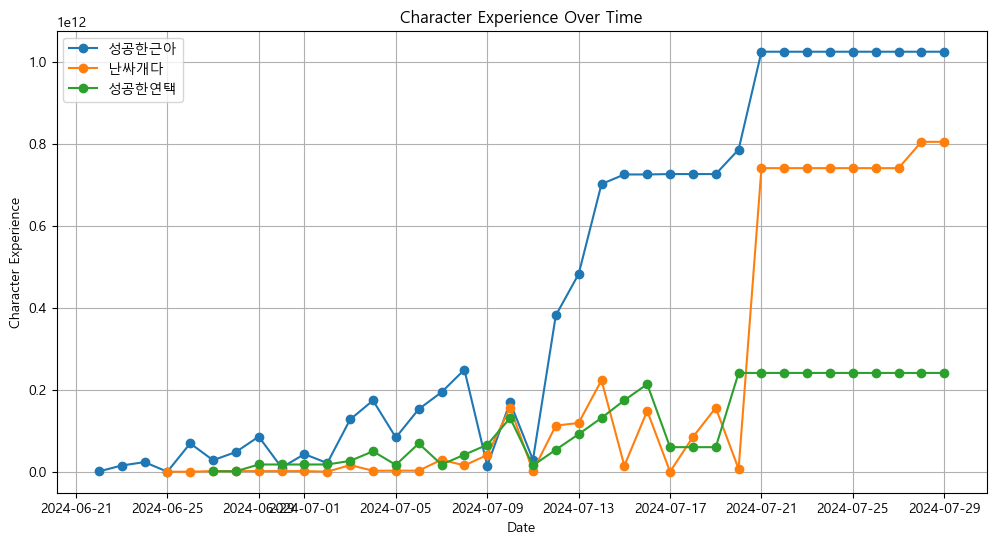

In [25]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt

# API 키
headers = {
    "x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# 여러 계정의 캐릭터 이름과 시작 날짜를 입력받음
accounts = []
num_accounts = int(input('몇 개의 계정 데이터를 가져오시겠습니까? '))

for i in range(num_accounts):
    character_name = input(f'계정 {i+1}의 캐릭터 이름을 입력하세요: ')
    start_date_input = input(f'계정 {i+1}의 시작 날짜를 입력하세요 (형식: YYYY-MM-DD): ')
    start_date = datetime.strptime(start_date_input, "%Y-%m-%d")
    accounts.append((character_name, start_date))

# 현재 날짜
end_date = datetime.now() - timedelta(days=1)

# 데이터 수집 및 병합
all_data = []

def get_response(url, headers, retries=3, wait=10):
    """Get a response with retry logic for 429 errors."""
    for _ in range(retries):
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response
        elif response.status_code == 429:
            print(f"429 Too Many Requests - 잠시 대기 후 다시 시도합니다.")
            time.sleep(wait)  # wait before retrying
        else:
            print(f"Error {response.status_code} - {response.reason}")
            break
    return None

for character_name, start_date in accounts:
    # 캐릭터 OCID 가져오기
    urlString = f"https://open.api.nexon.com/maplestory/v1/id?character_name={character_name}"
    response = get_response(urlString, headers)

    if response and response.status_code == 200:
        ocid = response.json()['ocid']
        data = []
        
        date_list = [(start_date + timedelta(days=x)).strftime("%Y-%m-%d") for x in range((end_date - start_date).days + 1)]
        
        for date in date_list:
            urlString = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={date}"
            response = get_response(urlString, headers)
            
            if response and response.status_code == 200:
                character_data = response.json()
                character_data['date'] = date  # 날짜 정보 추가
                character_data['character_name'] = character_name  # 캐릭터 이름 추가
                data.append(pd.json_normalize(character_data))
            else:
                print(f"{date}의 데이터를 가져오는 중 오류 발생: {response.status_code}")

        if data:
            account_data = pd.concat(data, ignore_index=True)
            all_data.append(account_data)
        else:
            print(f"{character_name}의 데이터를 표시할 데이터가 없습니다.")
    else:
        print(f"{character_name}의 OCID를 가져오는 중 오류 발생: {response.status_code}")

# 모든 계정의 데이터를 병합
if all_data:
    merged_data = pd.concat(all_data, ignore_index=True)

    # 'date' 컬럼을 datetime 형식으로 변환
    merged_data['date'] = pd.to_datetime(merged_data['date'])

    # 그래프 생성
    plt.figure(figsize=(12, 6))

    for character_name in merged_data['character_name'].unique():
        character_data = merged_data[merged_data['character_name'] == character_name]
        plt.plot(character_data['date'], character_data['character_exp'], marker='o', label=character_name)

    plt.xlabel('Date')
    plt.ylabel('Character Experience')
    plt.title('Character Experience Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("표시할 데이터가 없습니다.")


In [5]:
chdata

,date,character_name,world_name,character_gender,character_class,character_class_level,character_level,character_exp,character_exp_rate,character_guild_name,character_image,character_date_create,access_flag,liberation_quest_clear_flag
0,2024-06-25T00:00+09:00,난싸개다,버닝,여,메카닉,1,10,467,37.601,None,https://open.api.nexon.com/static/maplestory/C...,2024-06-25T00:00+09:00,true,false
1,2024-06-26T00:00+09:00,난싸개다,버닝,여,메카닉,4,200,3152499,0.143,None,https://open.api.nexon.com/static/maplestory/C...,2024-06-25T00:00+09:00,true,false
2,2024-06-27T00:00+09:00,난싸개다,버닝,여,메카닉,5,212,1506882245,15.372,None,https://open.api.nexon.com/static/maplestory/C...,2024-06-25T00:00+09:00,true,false
3,2024-06-28T00:00+09:00,난싸개다,버닝,여,메카닉,5,212,1506882245,15.372,None,https://open.api.nexon.com/static/maplestory/C...,2024-06-25T00:00+09:00,true,false
4,2024-06-29T00:00+09:00,난싸개다,버닝,여,메카닉,5,212,1506882245,15.372,None,https://open.api.nexon.com/static/maplestory/C...,2024-06-25T00:00+09:00,true,false
5,2024-06-30T00:00+09:00,난싸개다,버닝,여,메카닉,5,212,1506882245,15.372,None,https://open.api.nexon.com/static/maplestory/C...,2024-06-25T00:00+09:00,true,false
6,2024-07-01T00:00+09:00,난싸개다,버닝,여,메카닉,5,212,1506882245,15.372,None,https://open.api.nexon.com/static/maplestory/C...,2024-06-25T00:00+09:00,true,false
7,2024-07-02T00:00+09:00,난싸개다,버닝,여,메카닉,5,227,20992658,0.037,None,https://open.api.nexon.com/static/maplestory/C...,2024-06-25T00:00+09:00,true,false
8,2024-07-03T00:00+09:00,난싸개다,버닝,여,메카닉,5,227,16211169040,28.838,None,https://open.api.nexon.com/static/maplestory/C...,2024-06-25T00:00+09:00,true,false
9,2024-07-04T00:00+09:00,난싸개다,버닝,여,메카닉,5,233,2388173015,2.612,None,https://open.api.nexon.com/static/maplestory/C...,2024-06-25T00:00+09:00,true,false


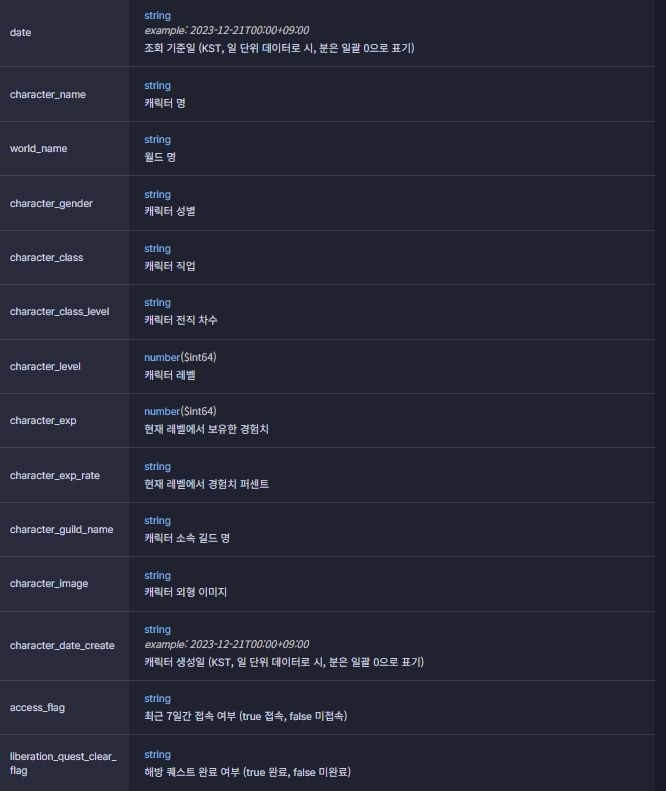

# 캐릭터 종합 능력치 정보 조회

In [131]:
import requests
headers = {
"x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}

characterName = input('캐릭터 이름')
urlString = "https://open.api.nexon.com/maplestory/v1/id?character_name=" + characterName
response = requests.get(urlString, headers = headers)
    
ocid = response.json()['ocid']
      
urlString = "https://open.api.nexon.com/maplestory/v1/character/stat?ocid="+ ocid +"&2024-07-22"
response = requests.get(urlString, headers = headers)
    
print(response.json())

캐릭터 이름 맑음


{'date': None, 'character_class': '제논', 'final_stat': [{'stat_name': '최소 스탯공격력', 'stat_value': '250298536'}, {'stat_name': '최대 스탯공격력', 'stat_value': '278109483'}, {'stat_name': '데미지', 'stat_value': '106.00'}, {'stat_name': '보스 몬스터 데미지', 'stat_value': '536.00'}, {'stat_name': '최종 데미지', 'stat_value': '26.50'}, {'stat_name': '방어율 무시', 'stat_value': '97.75'}, {'stat_name': '크리티컬 확률', 'stat_value': '90'}, {'stat_name': '크리티컬 데미지', 'stat_value': '106.40'}, {'stat_name': '상태이상 내성', 'stat_value': '70'}, {'stat_name': '스탠스', 'stat_value': '100'}, {'stat_name': '방어력', 'stat_value': '99999'}, {'stat_name': '이동속도', 'stat_value': '160'}, {'stat_name': '점프력', 'stat_value': '123'}, {'stat_name': '스타포스', 'stat_value': '401'}, {'stat_name': '아케인포스', 'stat_value': '1350'}, {'stat_name': '어센틱포스', 'stat_value': '660'}, {'stat_name': 'STR', 'stat_value': '56041'}, {'stat_name': 'DEX', 'stat_value': '62670'}, {'stat_name': 'INT', 'stat_value': '28799'}, {'stat_name': 'LUK', 'stat_value': '64591'}, {'stat_na

In [97]:
import requests
import json
import pandas as pd

headers = {
    "x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# 리스트를 사용하여 변수 초기화
characterNames = []
urlStrings = []
responses = []

for i in range(4):
    character_name = input('캐릭터 이름: ')
    characterNames.append(character_name)
    urlString = "https://open.api.nexon.com/maplestory/v1/id?character_name=" + character_name+"&date=2024-07-22"
    response = requests.get(urlString, headers=headers)
    
    if response.status_code == 200:
        ocid = response.json()['ocid']
        urlString = "https://open.api.nexon.com/maplestory/v1/character/stat?ocid=" + ocid
        response = requests.get(urlString, headers=headers)
        urlStrings.append(urlString)
        responses.append(response)
    else:
        print(f"Error fetching OCID for {character_name}: {response.status_code}")
        urlStrings.append(None)
        responses.append(None)

# 데이터를 저장할 리스트 초기화
data = []

# 각 리스트의 내용을 출력하고 데이터프레임에 추가
for i in range(4):
    if responses[i] is not None and responses[i].status_code == 200:
        
        data.append(pd.json_normalize(responses[i].json()))
    else:
        print(f"Error fetching data for {characterNames[i]}")

# 데이터프레임으로 결합
if data:
    statdata = pd.concat(data, ignore_index=True)
    print(statdata)
else:
    print("No data to display.")


캐릭터 이름:  


Error fetching OCID for : 400


캐릭터 이름:  


Error fetching OCID for : 400


캐릭터 이름:  


Error fetching OCID for : 400


캐릭터 이름:  


Error fetching OCID for : 400
Error fetching data for 
Error fetching data for 
Error fetching data for 
Error fetching data for 
No data to display.


In [102]:
statdata["final_stat"]

0    [{'stat_name': '최소 스탯공격력', 'stat_value': '8334...
1    [{'stat_name': '최소 스탯공격력', 'stat_value': '3828...
2    [{'stat_name': '최소 스탯공격력', 'stat_value': '6022...
3    [{'stat_name': '최소 스탯공격력', 'stat_value': '4726...
Name: final_stat, dtype: object

# 스타포스 강화 결과 조회

In [129]:
headers = {
"x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}
  

urlString = 'https://open.api.nexon.com/maplestory/v1/history/starforce?count=500&date=2020-12-27&cursor=%3F'
response = requests.get(urlString, headers = headers)
  
print(response.json())

{'error': {'name': 'OPENAPI00003', 'message': 'Please input valid id'}}
